In [1]:
#!/usr/bin/python

import os
print(os.listdir("../input"))

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
import pickle

#import standard ML libraries
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.utils.multiclass import unique_labels
#import specific classifiers
from sklearn.ensemble import RandomForestClassifier

#keras NN libraries:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, BatchNormalization
from tensorflow.python.keras.callbacks import EarlyStopping
import h5py


print('Lib import check positive ++.')

# Any results you write to the current directory are saved as output.

FileNotFoundError: [WinError 3] The system cannot find the path specified: '../input'

In [46]:
test_data = pd.read_csv('../input/test.csv')
print("Test data :", test_data.shape)
train_data = pd.read_csv('../input/train.csv')
print("Train data :", train_data.shape)
target = pd.read_csv('../input/sample_submission.csv')
print("Target :", target.shape)

Test data : (200000, 201)
Train data : (200000, 202)
Target : (200000, 2)


In [47]:
#check a sample output of first few rows:
print(train_data.head(5))

   ID_code  target    var_0   var_1   ...     var_196  var_197  var_198  var_199
0  train_0       0   8.9255 -6.7863   ...      7.8784   8.5635  12.7803  -1.0914
1  train_1       0  11.5006 -4.1473   ...      8.1267   8.7889  18.3560   1.9518
2  train_2       0   8.6093 -2.7457   ...     -6.5213   8.2675  14.7222   0.3965
3  train_3       0  11.0604 -2.1518   ...     -2.9275  10.2922  17.9697  -8.9996
4  train_4       0   9.8369 -1.4834   ...      3.9267   9.5031  17.9974  -8.8104

[5 rows x 202 columns]


In [48]:
def data_target_split (df):
    X = df.iloc[:,2:].values
    y = df.iloc[:,1].values
    return X, y
X, y = data_target_split(train_data)
#select the right part of the final test data
test_data = test_data.iloc[:,1:].values

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 329)

In [50]:
#scale the X_train with Min Max scaler:
scaler = StandardScaler()
scaler.fit(X_train)
X_tr_scaled = scaler.transform(X_train)
X_tst_scaled = scaler.transform(X_test)

#check the output shapes:
X_train.shape, y_train.shape

((150000, 200), (150000,))

In [52]:
def make_model(input_dim = 200):
    model = Sequential()
    #input 
    model.add(Dense(200, input_dim=input_dim))
    model.add(Activation("relu"))
    model.add(Dropout(0.2))
    #1 
    model.add(Dense(100))
    model.add(Activation("relu"))
    model.add(Dropout(0.2))
    #3
    model.add(Dense(50))
    model.add(Activation("tanh"))
    #output
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])
    print(model.summary())
    return model
model = make_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 200)               40200     
_________________________________________________________________
activation_9 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               20100     
_________________________________________________________________
activation_10 (Activation)   (None, 100)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 50)                5050      
__________

In [54]:
earlystopper = EarlyStopping(patience=5, verbose=1)
history = model.fit(X_tr_scaled, y_train, batch_size=350, epochs=70, validation_split=0.2, verbose=2, callbacks=[earlystopper])

Train on 120000 samples, validate on 30000 samples
Epoch 1/70
 - 2s - loss: 0.2677 - acc: 0.9045 - val_loss: 0.2593 - val_acc: 0.9023
Epoch 2/70
 - 2s - loss: 0.2633 - acc: 0.9052 - val_loss: 0.2566 - val_acc: 0.9040
Epoch 3/70
 - 2s - loss: 0.2611 - acc: 0.9055 - val_loss: 0.2547 - val_acc: 0.9049
Epoch 4/70
 - 2s - loss: 0.2584 - acc: 0.9065 - val_loss: 0.2542 - val_acc: 0.9054
Epoch 5/70
 - 2s - loss: 0.2564 - acc: 0.9063 - val_loss: 0.2519 - val_acc: 0.9063
Epoch 6/70
 - 2s - loss: 0.2548 - acc: 0.9071 - val_loss: 0.2507 - val_acc: 0.9062
Epoch 7/70
 - 2s - loss: 0.2531 - acc: 0.9068 - val_loss: 0.2508 - val_acc: 0.9063
Epoch 8/70
 - 2s - loss: 0.2515 - acc: 0.9076 - val_loss: 0.2498 - val_acc: 0.9067
Epoch 9/70
 - 2s - loss: 0.2505 - acc: 0.9079 - val_loss: 0.2491 - val_acc: 0.9070
Epoch 10/70
 - 2s - loss: 0.2495 - acc: 0.9081 - val_loss: 0.2488 - val_acc: 0.9072
Epoch 11/70
 - 2s - loss: 0.2481 - acc: 0.9088 - val_loss: 0.2484 - val_acc: 0.9072
Epoch 12/70
 - 2s - loss: 0.2478 -

50000/50000 [==============================] - 1s 21us/step
accuracy for test data: 91.19%


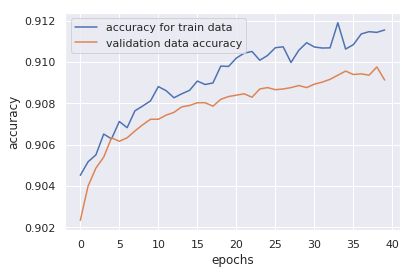

In [55]:
scores = model.evaluate(X_tst_scaled, y_test, verbose=1)
print("accuracy for test data: %.2f%%" % (scores[1]*100))
plt.plot(history.history['acc'], label='accuracy for train data')
plt.plot(history.history['val_acc'], label='validation data accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [60]:
pred_y = model.predict(X_tst_scaled)
roc_auc_score(y_test, pred_y)

0.8491341223991729

In [62]:
version = "1_0xx200:100:50"
print("Version :", version)
def save_model(model, model_filename):
    # save the model to file:
    model.save(model_filename)
    print("======> Saved model to filename: {filename}".format(filename=model_filename))
model_filename = "{version}.h5".format(version=version)
save_model(model=model, model_filename=model_filename)

Version : 1_0xx200:100:50
======> Saved model to filename: 1_0xx200:100:50.h5


In [ ]:
y_pred_t = model.predict(test_data)
target['target'] = y_pred_t
target.to_csv('submission.csv', index=False)